# PSYN

# Importation des bibliothèques

In [5]:
#!pip install nbformat
#!pip install nbconvert
#!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd  # Manipulation de données
import numpy as np  # Calculs numériques
import matplotlib.pyplot as plt  # Visualisation de données
import nbformat
from nbconvert.preprocessors import ExecutePreprocessor
import seaborn as sns  # Visualisation avancée
import sklearn
from datetime import datetime
import seaborn as sns

# Importation des bibliothèques de scikit-learn pour la modélisation
from sklearn.model_selection import train_test_split  # Division des données en ensembles d'entraînement et de test
from sklearn.ensemble import RandomForestClassifier  # Modèle de classification Random Forest
from sklearn.linear_model import LinearRegression  # Modèle de régression linéaire
from sklearn.pipeline import make_pipeline  # Construction de pipelines pour le prétraitement et les modèles
from sklearn.preprocessing import StandardScaler, PolynomialFeatures  # Normalisation et transformation polynomiale
from sklearn.decomposition import PCA  # Réduction de dimension avec PCA
from sklearn.metrics import accuracy_score, classification_report   # Évaluation des modèles
from sklearn.metrics import confusion_matrix

# Import des outils de scikit-learn nécessaires
from sklearn.model_selection import GridSearchCV  # Optimisation des hyperparamètres
from sklearn.metrics import roc_auc_score, roc_curve  # Évaluation avec AUC-ROC
from sklearn.model_selection import cross_val_score  # Validation croisée
from sklearn.metrics import mean_squared_error

# Importation des données

In [21]:
# Charger le fichier Excel
# df = pd.read_excel("C:\\Users\\anton\\Downloads\\sncf_data.xlsx")  
df = pd.read_excel("C:\\Users\\\scoup\\Downloads\\sncf_data.xlsx")
# Convertir en CSV
df.to_csv("data_csv", index=False, encoding="utf-8")

ligns,columns = df.shape
df.head()


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\scoup\AppData\Local\Temp\ipykernel_22184\2753491967.py:3: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_excel("C:\\Users\\\scoup\\Downloads\\sncf_data.xlsx")


,symbol,supplier,serial letter,repair complexity (0NA),evaluation ratio between repair cost and cost of new (0NA),\nexisting substitute product (0NA),component having a role in security (0NA),does the product/block if the component have a role in security? (0NA),several components involved? (0NA),is the product recent? (<10 years) (0NA),...,do we have equipment to carry out approval tests? (0NA),have we done a technical validation? (0NA),generally at least equivalent criterion,active quantity,quantity of existing stock at SNCF?,qté cible,"no longer supply (new or used), no longer supply new, reparable, supply new",product policy (short-term vision year - 2023),processing date,label
0,79544181,SCLE,AB,1,1,1,1,1,1,0,...,0,0,1,1050,837,NaN,supply new,6,2023-07-05,stock
1,79402561,SCLE,BA,0,0,0,0,0,1,0,...,1,1,1,436,999,NaN,supply new,100,2023-07-11,redesign mineur
2,79540265,SCLE,BA,0,0,1,0,1,0,0,...,1,1,1,70,1655,NaN,supply new,100,2022-08-01,substitution
3,79540265,SCLE,BB,0,0,1,0,1,0,0,...,1,1,1,149,1655,NaN,supply new,100,2022-08-01,substitution
4,79540265,SCLE,BBM,0,0,1,0,1,0,0,...,1,1,1,24,1655,NaN,supply new,100,2022-08-01,substitution


Titres et infos des colonnes

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 22 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   symbol                                                                       317 non-null    int64         
 1   supplier                                                                     317 non-null    object        
 2   serial letter                                                                317 non-null    object        
 3   repair complexity (0NA)                                                      317 non-null    int64         
 4   evaluation ratio between repair cost and cost of new (0NA)                   317 non-null    int64         
 5   
existing substitute product (0NA)                                           317 non-null    int64 

Statistiques descriptives

In [23]:
print("\nStatistiques descriptives :")
print(df.describe(include='all'))


Statistiques descriptives :
              symbol supplier serial letter  repair complexity (0NA)  \
count   3.170000e+02      317           317               317.000000   
unique           NaN       11            84                      NaN   
top              NaN  HITACHI            AA                      NaN   
freq             NaN      223            20                      NaN   
mean    7.929434e+07      NaN           NaN                 0.085174   
min     2.071580e+06      NaN           NaN                 0.000000   
25%     7.954026e+07      NaN           NaN                 0.000000   
50%     7.954401e+07      NaN           NaN                 0.000000   
75%     7.954502e+07      NaN           NaN                 0.000000   
max     7.956512e+07      NaN           NaN                 1.000000   
std     4.351020e+06      NaN           NaN                 0.279581   

        evaluation ratio between repair cost and cost of new (0NA)  \
count                               

# Adaptation des données

In [24]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
symbol                                                                           0
supplier                                                                         0
serial letter                                                                    0
repair complexity (0NA)                                                          0
evaluation ratio between repair cost and cost of new (0NA)                       0
\nexisting substitute product (0NA)                                              0
component having a role in security (0NA)                                        0
does the product/block if the component have a role in security? (0NA)           0
several components involved? (0NA)                                               0
is the product recent? (<10 years) (0NA)                                         0
\nis the cost of inventory expensive (0NA)                                       3
substitution component not available (0NA)            

In [25]:
# On ne prend pas en compte les colonnes "qté cible" et "product policy" (trop de valeurs manquantes)*

df = df.drop(columns=['qté cible','product policy (short-term vision year - 2023)'])

In [26]:
# On remplace les cellules vides par la valeur 0

df.fillna(0, inplace=True)  # Remplace les NaN par 0



In [27]:
df.head()

,symbol,supplier,serial letter,repair complexity (0NA),evaluation ratio between repair cost and cost of new (0NA),\nexisting substitute product (0NA),component having a role in security (0NA),does the product/block if the component have a role in security? (0NA),several components involved? (0NA),is the product recent? (<10 years) (0NA),\nis the cost of inventory expensive (0NA),substitution component not available (0NA),do we have equipment to carry out approval tests? (0NA),have we done a technical validation? (0NA),generally at least equivalent criterion,active quantity,quantity of existing stock at SNCF?,"no longer supply (new or used), no longer supply new, reparable, supply new",processing date,label
0,79544181,SCLE,AB,1,1,1,1,1,1,0,0.0,0,0,0,1,1050,837,supply new,2023-07-05,stock
1,79402561,SCLE,BA,0,0,0,0,0,1,0,0.0,1,1,1,1,436,999,supply new,2023-07-11,redesign mineur
2,79540265,SCLE,BA,0,0,1,0,1,0,0,0.0,0,1,1,1,70,1655,supply new,2022-08-01,substitution
3,79540265,SCLE,BB,0,0,1,0,1,0,0,0.0,0,1,1,1,149,1655,supply new,2022-08-01,substitution
4,79540265,SCLE,BBM,0,0,1,0,1,0,0,0.0,0,1,1,1,24,1655,supply new,2022-08-01,substitution


# Analyse de la distribution des variables

Pour les colonnes à valeurs binaires

Colonnes binaires détectées : ['repair complexity (0NA)', 'evaluation ratio between repair cost and cost of new (0NA)', '\nexisting substitute product (0NA)', 'component having a role in security (0NA)', 'does the product/block if the component have a role in security? (0NA)', 'several components involved? (0NA)', 'is the product recent? (<10 years) (0NA)', '\nis the cost of inventory expensive (0NA)', 'substitution component not available (0NA)', 'do we have equipment to carry out approval tests? (0NA)', 'have we done a technical validation? (0NA)', 'generally at least equivalent criterion']


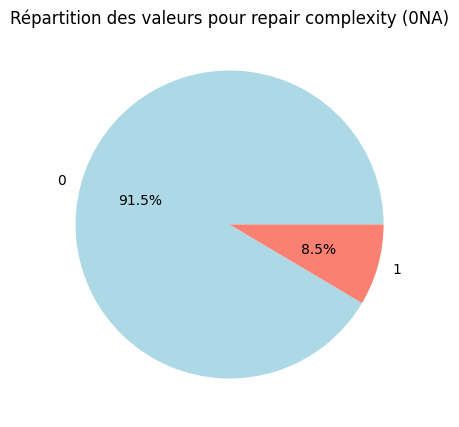

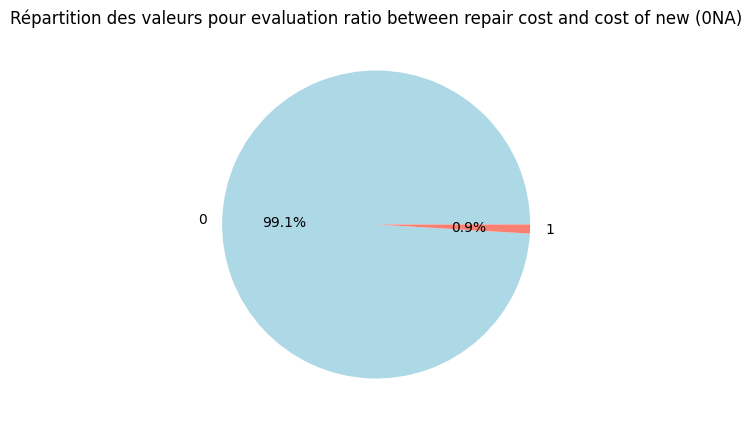

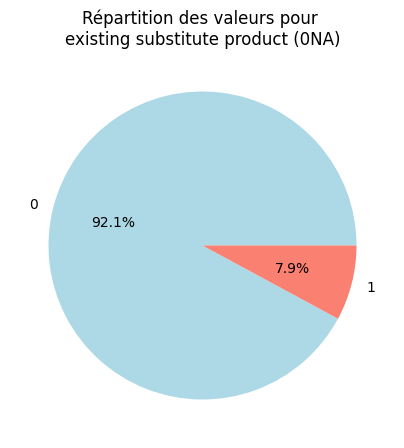

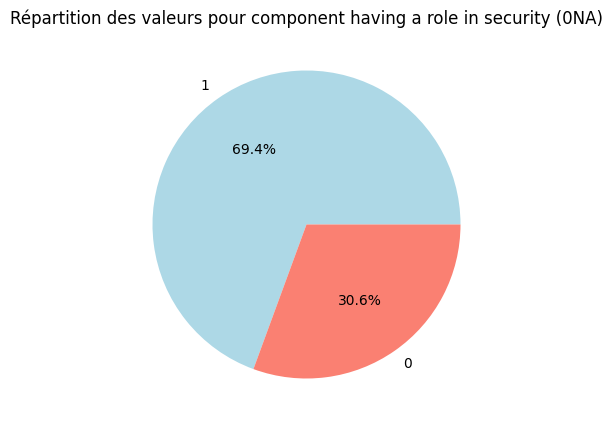

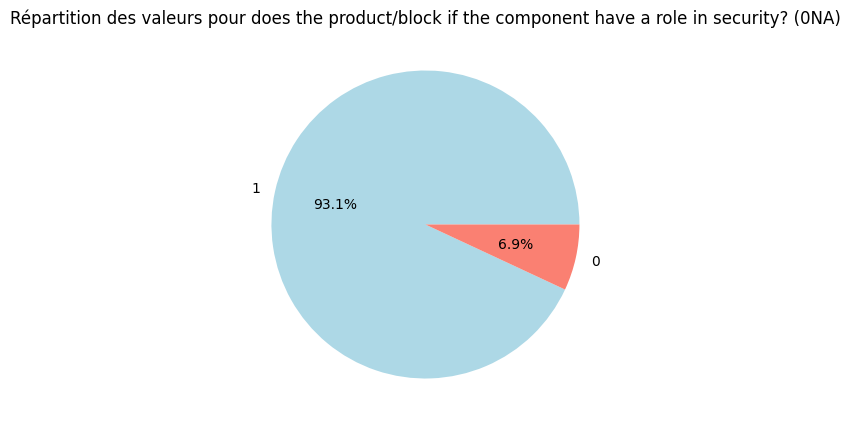

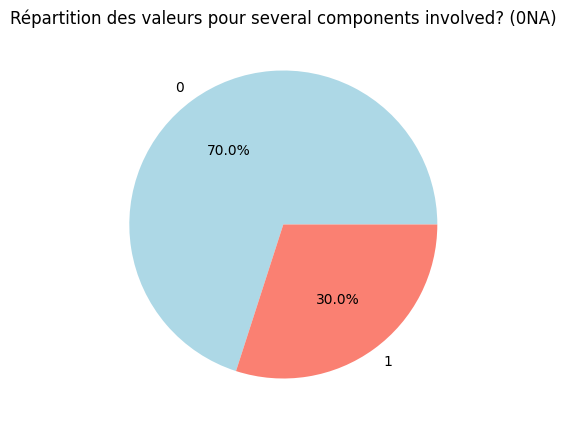

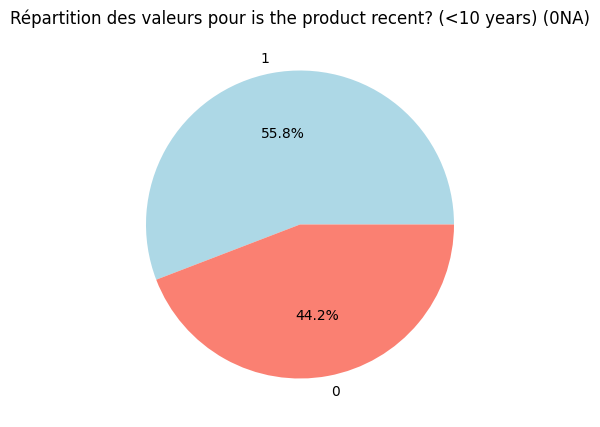

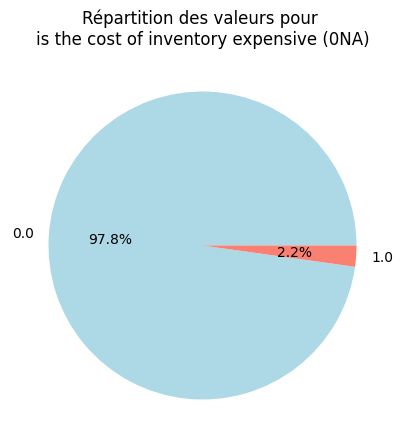

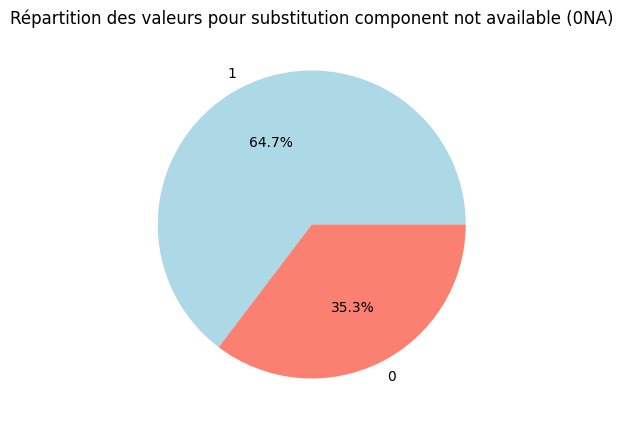

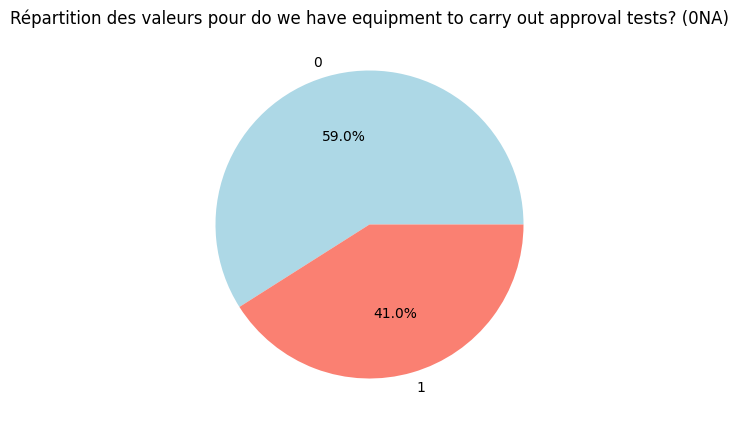

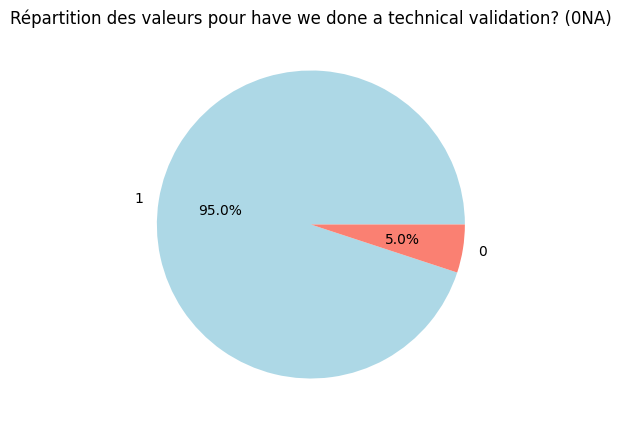

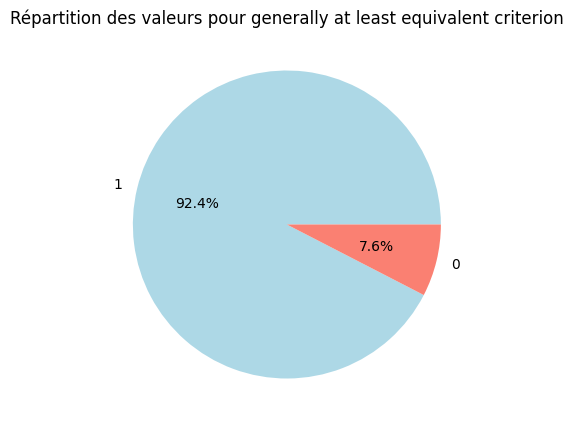

In [28]:
# Sélectionner uniquement les colonnes binaires (0 ou 1)
binary_cols = [col for col in df.columns if df[col].nunique() == 2 and sorted(df[col].unique()) == [0, 1]]

# Vérifier les colonnes binaires trouvées
print(f"Colonnes binaires détectées : {binary_cols}")

# Créer des camemberts uniquement pour ces colonnes
for col in binary_cols:
    plt.figure(figsize=(5, 5))
    df[col].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "salmon"])
    plt.title(f"Répartition des valeurs pour {col}")
    plt.ylabel("")  # Masquer l'étiquette Y
    plt.show()


La répartition des valeurs est déséquilibrée au niveau des inputs pour les colonnes suivantes :

- **Repair complexity** (0NA)  
- **Evaluation ratio between repair cost and cost of new** (0NA)  

- **Existing substitute product** (0NA)  
- **Existing substitute product** (0NA)  

- **Does the product/block or the component have a role in security?** (0NA)  

- **Is the cost of inventory expensive?** (0NA)  
- **Have we done a technical validation?** (0NA)  
- **Generally at least equivalent criterion**


Pour les colonnes à valeur numérique

Colonnes numériques non binaires détectées : ['active quantity', 'quantity of existing stock at SNCF?']


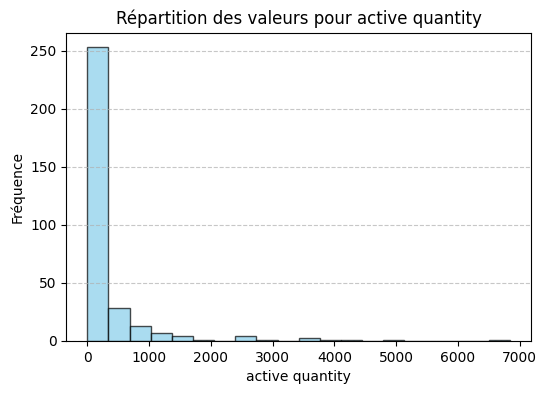

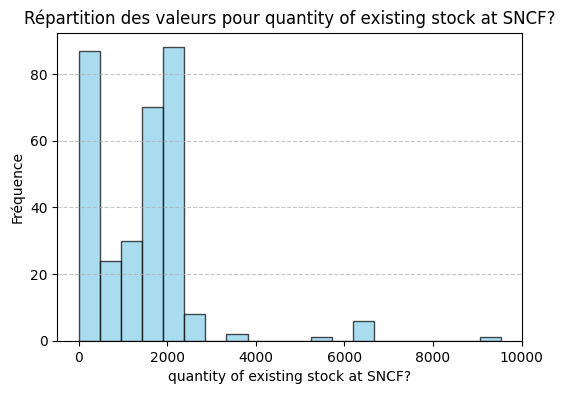

In [17]:
# Sélectionner uniquement les colonnes numériques NON binaires
num_cols = [col for col in df.select_dtypes(include=['number']).columns 
                if df[col].nunique() > 2 and col != "symbol"]  # Exclure "symbol"


# Vérifier les colonnes sélectionnées
print(f"Colonnes numériques non binaires détectées : {num_cols}")

# Créer un histogramme pour chaque colonne
for col in num_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Répartition des valeurs pour {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()


De même, pour les valeurs numériques, les données ne sont pas réparties de manière gaussienne.  


# Analyse de la corrélation entre les variables

Heat map de la corrélation entre les variables

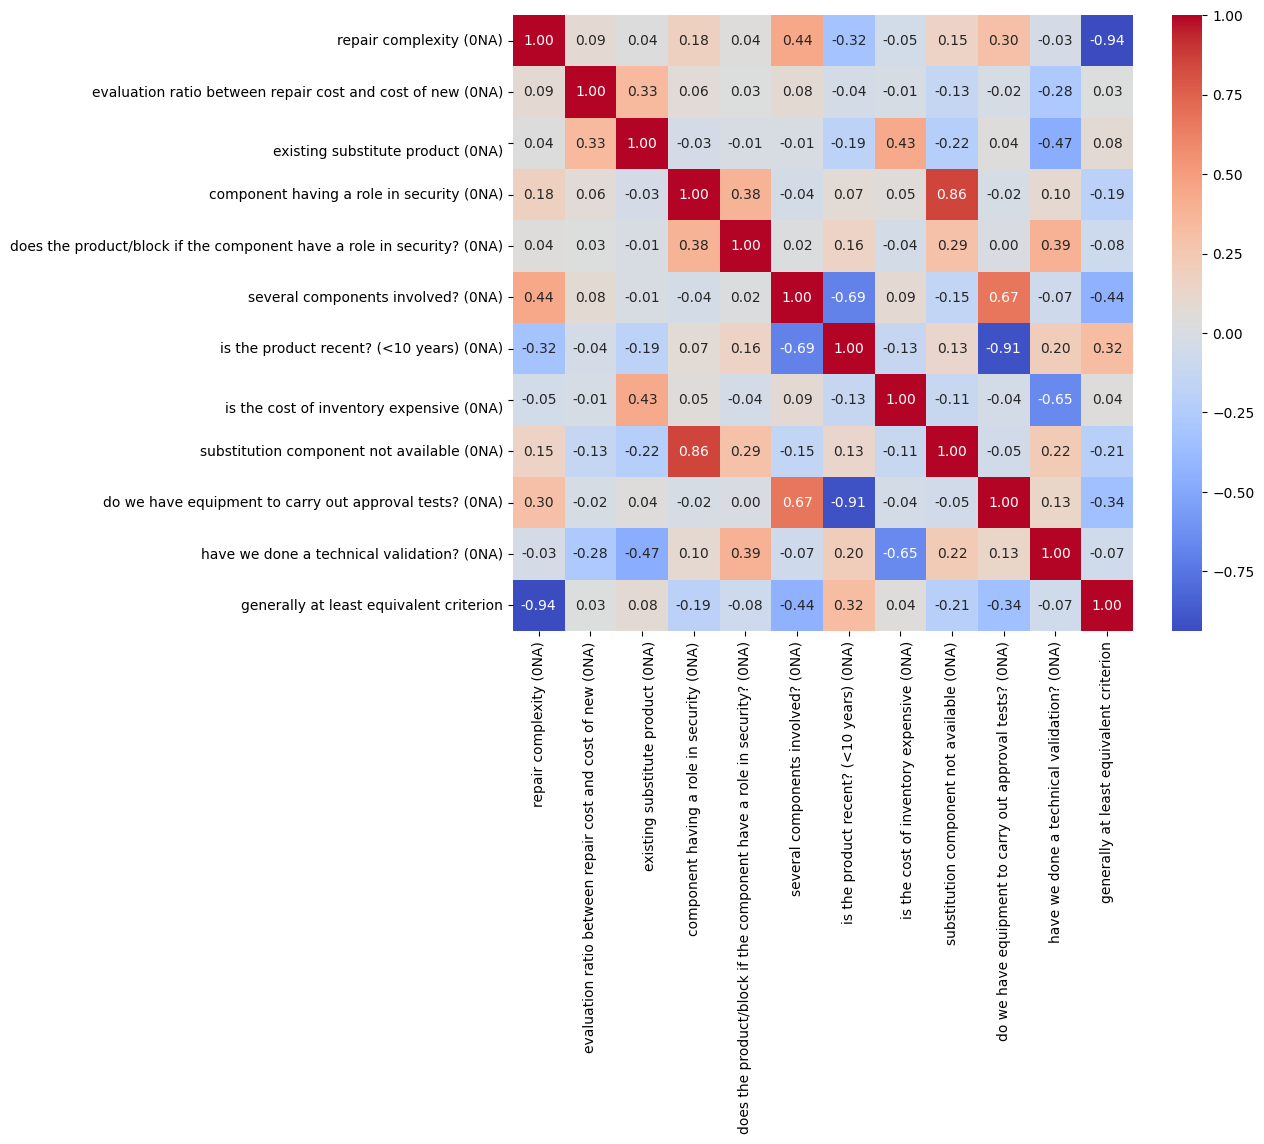

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 20 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   symbol                                                                       317 non-null    int64         
 1   supplier                                                                     317 non-null    object        
 2   serial letter                                                                317 non-null    object        
 3   repair complexity (0NA)                                                      317 non-null    int64         
 4   evaluation ratio between repair cost and cost of new (0NA)                   317 non-null    int64         
 5   
existing substitute product (0NA)                                           317 non-null    int64 

In [31]:
# Calculer la matrice de corrélation
corr_matrix = df[binary_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

print(df.info())

In [34]:
# Extraire les paires de colonnes avec une corrélation en valeur absolue > 0.50
strong_corr = corr_matrix.abs() > 0.50

# Afficher les colonnes fortement corrélées (en excluant la diagonale)
high_corr_pairs = [
    (col1, col2, corr_matrix.loc[col1, col2])
    for col1 in corr_matrix.columns
    for col2 in corr_matrix.columns
    if strong_corr.loc[col1, col2] and col1 != col2
]

# Convertir en DataFrame pour affichage
df_high_corr = pd.DataFrame(high_corr_pairs, columns=["Colonne 1", "Colonne 2", "Corrélation"])
df_high_corr = df_high_corr.drop_duplicates(subset=["Corrélation"]).sort_values(by="Corrélation", ascending=False)

# Affichage des colonnes fortement corrélées
display(df_high_corr)

,Colonne 1,Colonne 2,Corrélation
1,component having a role in security (0NA),substitution component not available (0NA),0.855380
3,several components involved? (0NA),do we have equipment to carry out approval tes...,0.672575
6,\nis the cost of inventory expensive (0NA),have we done a technical validation? (0NA),-0.651766
2,several components involved? (0NA),is the product recent? (<10 years) (0NA),-0.693943
5,is the product recent? (<10 years) (0NA),do we have equipment to carry out approval tes...,-0.911673
0,repair complexity (0NA),generally at least equivalent criterion,-0.937970


# Random Forest

In [49]:
# Convertir les colonnes de dates en nombre de jours depuis aujourd'hui
for col in df.select_dtypes(include=['datetime64']):
    df[col] = (datetime.today() - df[col]).dt.days 

# Séparer les features (X) et la cible (y)
target_column = "label"  # Remplace par le nom de ta colonne cible
X = df.drop(columns=[target_column])
y = df[target_column]

X





,symbol,supplier,serial letter,repair complexity (0NA),evaluation ratio between repair cost and cost of new (0NA),\nexisting substitute product (0NA),component having a role in security (0NA),does the product/block if the component have a role in security? (0NA),several components involved? (0NA),is the product recent? (<10 years) (0NA),\nis the cost of inventory expensive (0NA),substitution component not available (0NA),do we have equipment to carry out approval tests? (0NA),have we done a technical validation? (0NA),generally at least equivalent criterion,active quantity,quantity of existing stock at SNCF?,"no longer supply (new or used), no longer supply new, reparable, supply new",processing date
0,79544181,SCLE,AB,1,1,1,1,1,1,0,0.0,0,0,0,1,1050,837,supply new,593
1,79402561,SCLE,BA,0,0,0,0,0,1,0,0.0,1,1,1,1,436,999,supply new,587
2,79540265,SCLE,BA,0,0,1,0,1,0,0,0.0,0,1,1,1,70,1655,supply new,931
3,79540265,SCLE,BB,0,0,1,0,1,0,0,0.0,0,1,1,1,149,1655,supply new,931
4,79540265,SCLE,BBM,0,0,1,0,1,0,0,0.0,0,1,1,1,24,1655,supply new,931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,79545633,HITACHI,B__,1,0,0,1,1,1,0,0.0,1,1,1,0,0,876,supply new,2180
313,79545464,Alstom,AAA,0,0,0,1,0,0,0,0.0,0,1,1,1,6844,2305,supply new,5526
314,79545106,Alstom,AE,0,0,0,1,1,1,0,0.0,0,1,1,1,30,3583,supply new,882
315,79545106,Alstom,AE,0,0,0,1,1,1,0,0.0,0,1,1,1,30,3583,supply new,882


In [ ]:
# Stocker la colonne "symbol" pour l'afficher plus tard
X["symbol"] = df["symbol"]

# Encodage des variables catégorielles si nécessaire
# X = pd.get_dummies(X, drop_first=True)
# je crois il faut pas supprimer la première colonne
X = pd.get_dummies(X)
# Séparer les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

# Initialiser et entraîner le modèle Random Forest
model = RandomForestClassifier(n_estimators=1000,random_state=42)
model.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = model.predict(X_test)


In [42]:
# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle : {accuracy:.2f}")

# Rapport de classification
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Précision du modèle : 0.95

Rapport de classification :
                 precision    recall  f1-score   support

            LBO       1.00      0.88      0.93        24
redesign majeur       1.00      0.99      1.00       104
redesign mineur       1.00      0.90      0.95        21
          stock       0.00      0.00      0.00         7
   substitution       0.88      1.00      0.94        98

       accuracy                           0.95       254
      macro avg       0.78      0.75      0.76       254
   weighted avg       0.93      0.95      0.94       254



c:\Users\scoup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\scoup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\scoup\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

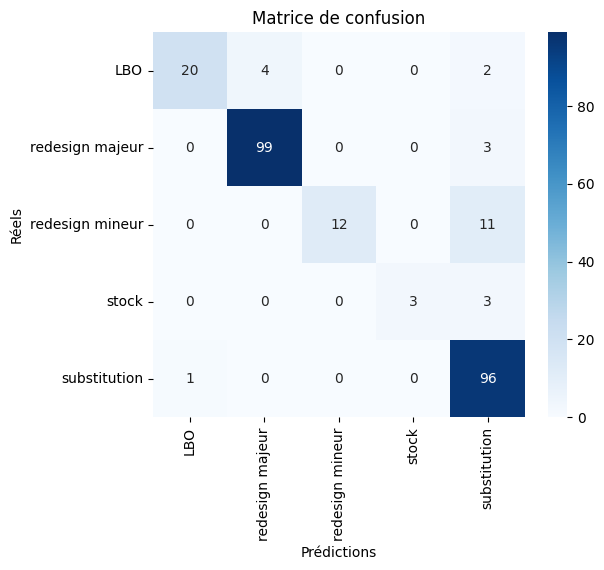

In [40]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["LBO","redesign majeur","redesign mineur","stock","substitution"], yticklabels=["LBO","redesign majeur","redesign mineur","stock","substitution"])
plt.xlabel("Prédictions")
plt.ylabel("Réels")
plt.title("Matrice de confusion")
plt.show()


Les chiffres dans la matrice représentent les nombre de cas pour chaque combinaison de classes réelles et prédites

# Comparaison prédictions/modèle

In [191]:
resultats = pd.DataFrame({
    "Symbol": X_test["symbol"],
    "Valeur Réelle": y_test.values,
    "Prédiction": y_pred
})

# Fonction pour colorer les cellules
def color_cells(val):
    color = "lightgreen" if val["Valeur Réelle"] == val["Prédiction"] else "lightcoral"
    return [f"background-color: {color}; color: black; font-weight: bold"] * len(val)

# Appliquer le style au DataFrame
styled_resultats = resultats.style.apply(color_cells, axis=1)

# Ajouter un titre avec la précision
styled_resultats.set_caption(f"📊 Précision du modèle : {accuracy:.1%}")

# Afficher le tableau dans Jupyter Notebook
styled_resultats

,Symbol,Valeur Réelle,Prédiction
153,79565121,substitution,substitution
108,79545693,substitution,substitution
247,79545018,LBO,LBO
19,79502667,redesign majeur,substitution
285,79544005,stock,substitution
250,79545019,LBO,LBO
173,79544009,redesign majeur,redesign majeur
117,79520912,substitution,substitution
253,79545019,LBO,LBO
182,79544010,redesign majeur,redesign majeur


# Amélioration Grid CV 
POints à voir : 
- problème de dimension dans la matrice de confusion
- Voir les différentes metrics macro et micro 
- (Dans le random forest) metre un état seed => pour faire les fonctions aléatoires pas vraiment aléatoire
-Voir la repartition des données de sorties et si elles sont désiquilibré (réequilibrer)
-Qu'est -ce qu'on peut deduire avec les correlations entre valeurs